In [1]:
import pickle 
import matplotlib.pyplot as plt

In [2]:
with open("../../data/trajectory_info_numgroups=5_poolsize=10.pickle", "rb") as f:
    trajectories = pickle.load(f)

In [3]:

metric_to_english = {
    "cumInfections": "cumulative infections",
    "cum_num_tests": "cumulative test consumption",
    "daily_sensitivity": r"daily sensitivity ($1-\beta$)",
    "numActiveInfections": "active infections",
    "mean_num_positives_in_positive_pool": "mean # positives in positive pools",
    "median_num_positives_in_positive_pool": "median # positives in positive pools",
    "mean_num_identifiable_positives_in_positive_pool": "mean # identifiable positives in positive pools",
    "daily_effective_efficiency": r"daily effective efficiency ($\gamma$)",
    "daily_effective_followup_efficiency": r"daily effective followup efficiency ($\eta$)",
    "num_susceptible_neighbors_of_identified_positives": "# susceptible neighbors of identified positives",
}

metric_to_english_caps = {
    "cumInfections": "Cumulative infections",
    "cum_num_tests": "Cumulative test consumption",
    "daily_sensitivity": r"Daily sensitivity ($1-\beta$)",
    "numActiveInfections": "Active infections",
    "mean_num_positives_in_positive_pool": "Mean # positives in positive pools",
    "median_num_positives_in_positive_pool": "Median # positives in positive pools",
    "mean_num_identifiable_positives_in_positive_pool": "Mean # identifiable positives in positive pools",
    "daily_effective_efficiency": r"Daily effective efficiency ($\gamma$)",
    "daily_effective_followup_efficiency": r"Daily effective followup efficiency ($\eta$)",
    "num_susceptible_neighbors_of_identified_positives": "# susceptible neighbors of identified positives",
}

colors = {
    "naive": "mediumpurple",
    "correlated": "mediumseagreen",
    "correlated_weak": "dodgerblue",
}

legends_dict = {
    "naive": "naive pooling",
    "correlated": "household-correlated pooling",
    "correlated_weak": "community-correlated pooling",
}

In [4]:
def plot_trajectory(
        traj_info, 
        policy,
        metrics_to_plot = None, 
        pooling_methods = ["naive", "correlated_weak", "correlated"], 
        save_fig=False,
        num_per_row = 2,
    ):

    plt.rcParams["font.family"] = 'serif'

    if metrics_to_plot == None:
        metrics_to_plot = traj_info[1].keys()

    # print(f"init_prev={traj_info[0]['init_prev']}, peak_VL={traj_info[0]['peak_VL']}, num_groups={traj_info[0]['num_groups']}, alpha={traj_info[0]['alpha']}, pool_size={traj_info[0]['pool_size']}, LoD={traj_info[0]['LoD']}, edge_weight={traj_info[0]['edge_weight']}, distancing_scale={traj_info[0]['distancing_scale']}")
    print(f"num_groups={traj_info[0]['num_groups']}, pool_size={traj_info[0]['pool_size']}")

    if num_per_row == 2:
        fig, axs = plt.subplots((len(metrics_to_plot)+1)//2, 2, figsize=(5*len(metrics_to_plot)/4, 3*4))
    elif num_per_row == 4:
        fig, axs = plt.subplots(2, (len(metrics_to_plot)+1)//2, figsize=(5*len(metrics_to_plot)/2, 3*2))

    fig.tight_layout(pad=2.5)
    fig.subplots_adjust(wspace=0.18)
    # fig.subplots_adjust(hspace=0.4)

    
    for i, metric in enumerate(metrics_to_plot):

        # row_idx = i // ((len(metrics_to_plot)+1)//2)
        # col_idx = i % ((len(metrics_to_plot)+1)//2)

        row_idx = i // num_per_row
        col_idx = i % num_per_row

        for pooling_method in pooling_methods:
            mean = traj_info[1][metric+"_"+pooling_method][0]
            sem = traj_info[1][metric+"_"+pooling_method][1]
            axs[row_idx][col_idx].plot(mean, label=legends_dict[pooling_method], color=colors[pooling_method])
            axs[row_idx][col_idx].fill_between(
                range(len(mean)),
                mean-2*sem,
                mean+2*sem,
                alpha=0.2,
                color=colors[pooling_method]
            )
        axs[row_idx][col_idx].set_xlabel("day", fontsize=12, labelpad=0.2)

        axs[row_idx][col_idx].set_title(metric_to_english_caps[metric], fontsize=14) # TODO: change back to no caps
            
    axs[len(metrics_to_plot) // num_per_row][len(metrics_to_plot) % num_per_row-1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.3, fontsize=14)
    fig.delaxes(axs[len(metrics_to_plot) // num_per_row, len(metrics_to_plot) % num_per_row])

    # plt.tight_layout()

    if save_fig:
        plt.savefig(f"../../figures/dynamic_sim_{policy}_{num_per_row}_per_row.pdf", bbox_inches='tight')

num_groups=5, pool_size=10


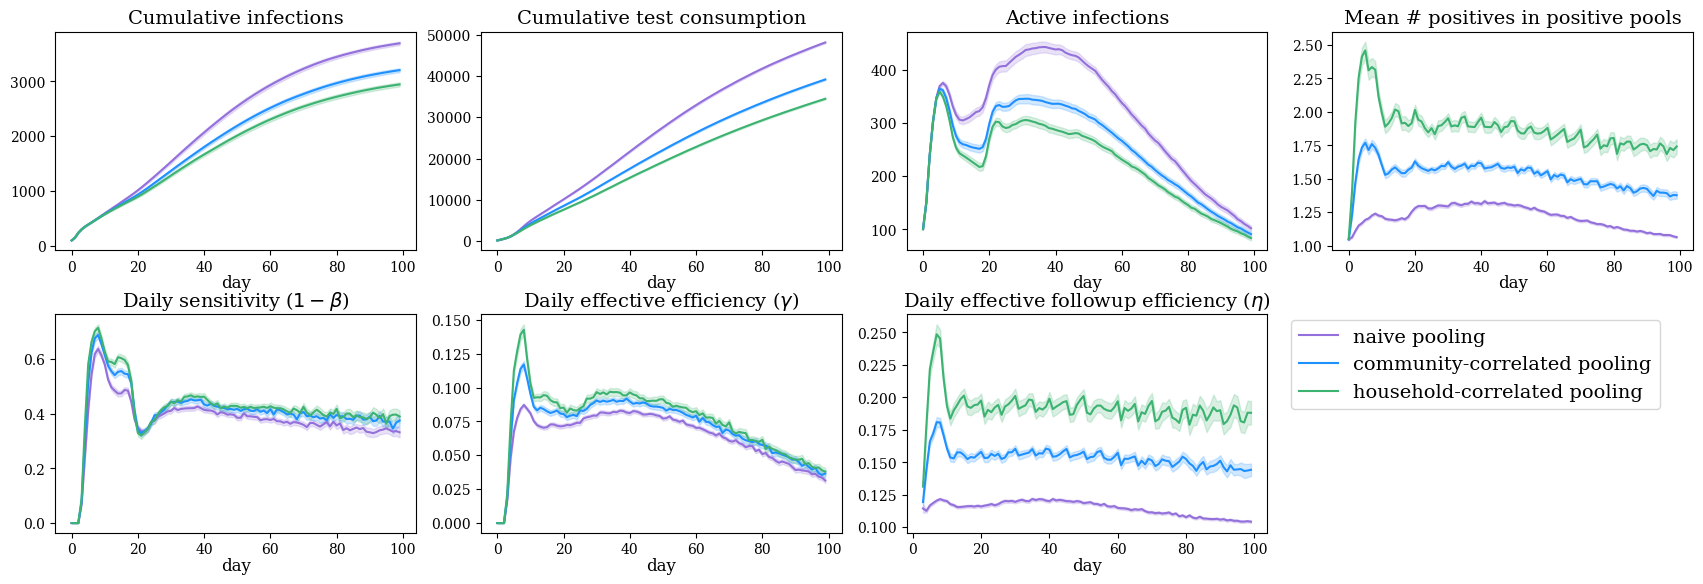

In [5]:
plot_num_groups = 5
plot_pool_size = 10
plot_dilute = "average"

for j in range(len(trajectories)):
    if trajectories[j][0]["distancing_scale"] == 50 \
        and trajectories[j][0]["num_groups"] == plot_num_groups \
            and trajectories[j][0]["pool_size"] == plot_pool_size \
                and trajectories[j][0]["dilute"]== plot_dilute:
        plot_trajectory(
            trajectories[j], 
            metrics_to_plot = [
                "cumInfections", 
                "cum_num_tests", 
                "numActiveInfections",
                # "mean_num_identifiable_positives_in_positive_pool",
                "mean_num_positives_in_positive_pool",
                # "median_num_positives_in_positive_pool", 
                "daily_sensitivity",
                "daily_effective_efficiency", 
                "daily_effective_followup_efficiency",
                # "mean_num_positives_in_positive_pool",
                # "num_susceptible_neighbors_of_unidentified_positives"
                
                # "cum_positives_identified"
                # "num_susceptible_neighbors_of_identified_positives"
            ],
            policy= f"num_groups={plot_num_groups}_pool_size={plot_pool_size}",
            save_fig=True,
            # save_fig=False,
            num_per_row = 4
        )

